In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Intro 
fix later and write an intro about the project

In [38]:
data = pd.read_csv('./data/ObesityDataSet_raw_and_data_sinthetic.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [39]:
data.rename(columns={'NObeyesdad':'NObesity'}, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [40]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


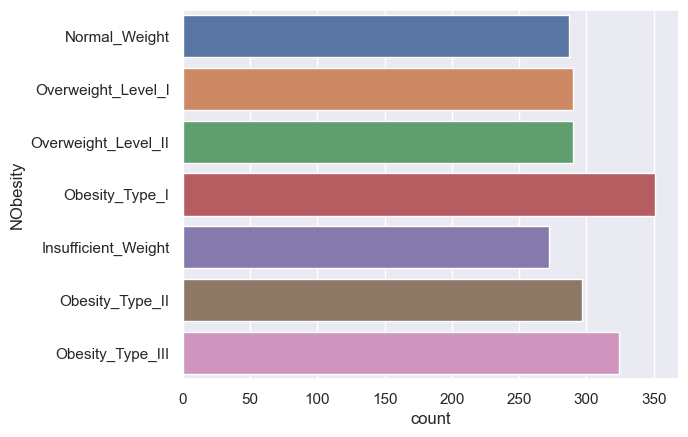

In [41]:
# Checking if the dependable variable is evenly distributed
sns.set_theme(style="darkgrid")
sns.countplot(y="NObesity", data=data);

There is an even distrubition of the target variable

In [42]:
# Because large part of the data is synthetic I want to check the unique values 
for i in range(len(data.columns)):
    print(f'Unique values for {data.columns[i]}: {data[data.columns[i]].unique()}')
    print('')

Unique values for Gender: ['Female' 'Male']

Unique values for Age: [21.       23.       27.       ... 22.524036 24.361936 23.664709]

Unique values for Height: [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]

Unique values for Weight: [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]

Unique values for family_history_with_overweight: ['yes' 'no']

Unique values for FAVC: ['no' 'yes']

Unique values for FCVC: [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 

Converting the floating point values into integers to have a better representation of the real data collectected through the survey

In [43]:
# Dealing with the synthtetic data by rounding the values 
data['Age'] = data['Age'].round(0).astype(int)
data['Height'] = data['Height'].round(2)
data['Weight'] = data['Weight'].round(2)
data['FCVC'] = data['FCVC'].round(0).astype(int)
data['NCP'] = data['NCP'].round(0).astype(int)
data['CH2O'] = data['CH2O'].round(0).astype(int)
data['FAF'] = data['FAF'].round(0).astype(int)
data['TUE'] = data['TUE'].round(0).astype(int)

Printing again the unique values to check if the desired result is achieved

In [44]:
# Cheking if the unique values are now matching the given discription
for i in range(len(data.columns)):
    print(f'Unique values for {data.columns[i]}: {data[data.columns[i]].unique()}')
    print('')

Unique values for Gender: ['Female' 'Male']

Unique values for Age: [21 23 27 22 29 24 26 41 30 52 20 19 31 39 17 25 55 38 18 15 61 44 34 36
 32 35 40 45 33 51 56 28 16 37 14 42 43 46 48 47]

Unique values for Height: [1.62 1.52 1.8  1.78 1.5  1.64 1.72 1.85 1.65 1.77 1.7  1.93 1.53 1.71
 1.69 1.6  1.75 1.68 1.58 1.79 1.56 1.67 1.66 1.81 1.82 1.55 1.61 1.63
 1.76 1.57 1.88 1.87 1.89 1.74 1.83 1.92 1.73 1.84 1.91 1.48 1.59 1.54
 1.9  1.86 1.45 1.98 1.51 1.46 1.49 1.95 1.94]

Unique values for Weight: [ 64.    56.    77.   ... 131.41 133.69 133.35]

Unique values for family_history_with_overweight: ['yes' 'no']

Unique values for FAVC: ['no' 'yes']

Unique values for FCVC: [2 3 1]

Unique values for NCP: [3 1 4 2]

Unique values for CAEC: ['Sometimes' 'Frequently' 'Always' 'no']

Unique values for SMOKE: ['no' 'yes']

Unique values for CH2O: [2 3 1]

Unique values for SCC: ['no' 'yes']

Unique values for FAF: [0 3 2 1]

Unique values for TUE: [1 0 2]

Unique values for CALC: ['no' 'Somet

In [45]:
# Changing the value for CH2O from 1,2,3 to 0,1,2 for consistancy
new_ch2o = []
for i in data['CH2O']:
    if i == 1:
        new_value = 0
        new_ch2o.append(new_value)
    elif i == 2:
        new_value = 1
        new_ch2o.append(new_value)
    elif i == 3:
        new_value = 2
        new_ch2o.append(new_value)

data['CH2O'] = new_ch2o

new_fcvc = []
for i in data['FCVC']:
    if i == 1:
        new_value = 0
        new_fcvc.append(new_value)
    elif i == 2:
        new_value = 1
        new_fcvc.append(new_value)
    elif i == 3:
        new_value = 2
        new_fcvc.append(new_value)

data['FCVC'] = new_fcvc

# There are 4 unique values for the NCP attribute but in the given discription there are only 3 possible option.Therefore the 3 and 4 values are both cahnged to 2
new_ncp = []
for i in data['NCP']:
    if i == 1:
        new_value = 0
        new_ncp.append(new_value)
    elif i == 2:
        new_value = 1
        new_ncp.append(new_value)
    elif i > 2:
        new_value = 2
        new_ncp.append(new_value)

data['NCP'] = new_ncp


In [46]:
# Cheking if the values are correctly changed
print(data['CH2O'].unique(), 
      data['FCVC'].unique(), 
      data['NCP'].unique())

[1 2 0] [1 2 0] [2 0 1]


In [47]:
# Missing values for each column
print(f'Number of missing values: {data.isnull().any().sum()}')

Number of missing values: 0


In [48]:
# Cheking for duplicated entries
print('Number of dublicated entries: ' + str(data.duplicated().sum()))

Number of dublicated entries: 55


In [49]:
# Dropping the duplicated entries
data.drop_duplicates(inplace = True)

In [50]:
# Labeling the non-numeric attributes
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'].values)
data['family_history_with_overweight'] = le.fit_transform(data['family_history_with_overweight'].values)
data['FAVC'] = le.fit_transform(data['FAVC'].values)
data['CAEC'] = le.fit_transform(data['CAEC'].values)
data['SMOKE'] = le.fit_transform(data['SMOKE'].values)
data['SCC'] = le.fit_transform(data['SCC'].values)
data['CALC'] = le.fit_transform(data['CALC'].values)
data['MTRANS'] = le.fit_transform(data['MTRANS'].values)
data['NObesity'] = le.fit_transform(data['NObesity'].values)

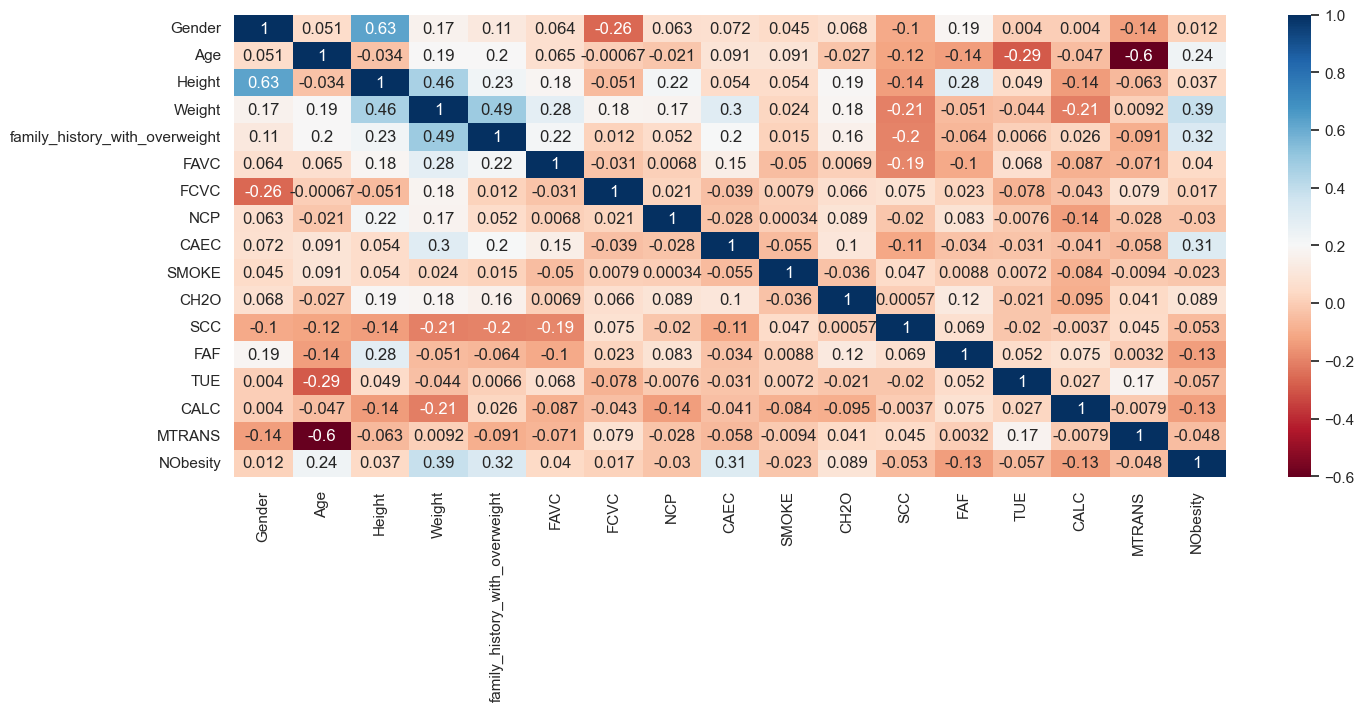

In [51]:
# Making a correlation table for the entire dataset
corrData = data.corr() 
plt.figure(figsize=(16, 6)) 
sns.heatmap(corrData, cmap="RdBu",annot=True);

There are no strong correlations

In [52]:
data['NObesity'] = le.inverse_transform(data['NObesity'].values)

In [53]:
data['NObesity']

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObesity, Length: 2056, dtype: object

In [54]:
df_copy = data.copy()
df_copy.drop(columns=['Height', 'Weight'], inplace=True)
df_copy.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObesity
0,0,21,1,0,1,2,2,0,1,0,0,1,3,3,Normal_Weight
1,0,21,1,0,2,2,2,1,2,1,3,0,2,3,Normal_Weight
2,1,23,1,0,1,2,2,0,1,0,2,1,1,3,Normal_Weight
3,1,27,0,0,2,2,2,0,1,0,2,0,1,4,Overweight_Level_I
4,1,22,0,0,1,0,2,0,1,0,0,0,2,3,Overweight_Level_II
